In [2]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf
import tensorflow_hub as hub

In [9]:
#stop photos


# Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\stop photos'

# Create an empty list to store the images
X = []
y = []

# Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image using OpenCV
        try:
            
                img = cv2.imread(os.path.join(path_to_folder, filename))
                resized_img = cv2.resize(img, (224, 224))
                normalized_img = resized_img / 255.0

                # Add the image to the list
                X.append(normalized_img)
                y.append(1)

        
        except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\stop photos'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\image data\stop photos01_stopsign_Stop-Signs-Used-to-Be-Yellow—More-Recently-Than-You-Think_376238113_Usa-Pyon.jpg does not exist


In [10]:
len(X)

435

In [38]:

 # Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\School zone'


    # Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
            
            try:
                    img = cv2.imread(os.path.join(path_to_folder, filename))
                    resized_img = cv2.resize(img, (224, 224))
                    normalized_img = resized_img / 255.0

                        # Add the image to the list
                    X.append(normalized_img)
                    y.append(0)
            except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\School zone'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\School zone.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\School zoneSchool Zone Hours (1600 × 900 px).png does not exist


In [39]:
len(X)

820

In [11]:
y_arr = np.array(y)
X_arr = np.array(X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(348, 224, 224, 3)

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [16]:
cnn = models.Sequential([
    #cnn
    
    layers.Conv2D(filters = 32, activation = 'relu', input_shape=(224,224,3),  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, activation = 'relu',  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense 
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
    
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
11/11 [==============================] - 6s 440ms/step - loss: 0.2109 - accuracy: 0.9080
Epoch 2/10
11/11 [==============================] - 5s 434ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 5s 456ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 5s 494ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 5s 453ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 5s 448ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 5s 445ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
11/11 [==============================] - 5s 451ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
11/11 [==============================] - 5s 446ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
11/11 [==============================] - 5s 453ms/step -

In [19]:
cnn.evaluate(X_test, y_test)

3/3 [==============================] - 0s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

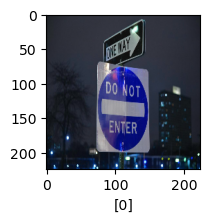

In [16]:
plot_sample(X_test, y_test,5)


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

6/6 [==============================] - 1s 85ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.87      0.78        82
           1       0.84      0.66      0.74        89

    accuracy                           0.76       171
   macro avg       0.77      0.76      0.76       171
weighted avg       0.78      0.76      0.76       171



# Transfer learning

In [49]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [50]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [51]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [53]:

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
21/21 [==============================] - 9s 288ms/step - loss: 0.5677 - acc: 0.7027
Epoch 2/5
21/21 [==============================] - 6s 289ms/step - loss: 0.2644 - acc: 0.9055
Epoch 3/5
21/21 [==============================] - 6s 293ms/step - loss: 0.1905 - acc: 0.9390
Epoch 4/5
21/21 [==============================] - 6s 285ms/step - loss: 0.1574 - acc: 0.9573
Epoch 5/5
21/21 [==============================] - 6s 280ms/step - loss: 0.1362 - acc: 0.9558


In [56]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 2s 252ms/step - loss: 0.1557 - acc: 0.9451


[0.1556704044342041, 0.9451219439506531]

In [57]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

6/6 [==============================] - 2s 243ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.93      0.97      0.95        86

    accuracy                           0.95       164
   macro avg       0.95      0.94      0.94       164
weighted avg       0.95      0.95      0.95       164



In [ ]:
count = 0
d_count = 0

import os
from PIL import Image

# Define the directory containing the images to classify
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random'

# Loop over each image in the directory
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
        try:
            
                count = count+1
                img = cv2.imread(os.path.join(path_to_folder, filename))

                resized_img = cv2.resize(img, (224, 224))
                img_array = np.array(resized_img)
                normalized_img = img_array / 255.0
                img_end = np.expand_dims(normalized_img, axis=0)



                # Classify the image and store the result

                y_pred = model.predict(img_end)
                y_pred_classes = [np.argmax(element) for element in y_pred]

                # Traceback the original filename of the image
                print(y_pred_classes)
                print(f"Original filename: {filename}, Classification result: {y_pred_classes}")
                if(y_pred_classes[0] ==0):

                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")

        except:
                        d_count = 0        
                
                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")
                


In [20]:
from keras.models import load_model
cnn.save('model.h5')
model_final = load_model('model.h5')

In [22]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(cnn, 'saved_model.pkl') 

INFO:tensorflow:Assets written to: ram://3cd10551-7a9a-4408-b7e0-61adf946bcb1/assets


['saved_model.pkl']

In [24]:
model_final.evaluate(X_test,y_test)

3/3 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]